In [26]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

### Data Import

In [27]:
# Import the five datasets we'll be using in the modelling phase
df_1 = pd.read_csv('../../data/processed/HID_cleaned_ChronicObstructivePulmonaryDisease.csv')
df_2 = pd.read_csv('../../data/processed/HID_cleaned_HeartFailure.csv')
df_3 = pd.read_csv('../../data/processed/HID_cleaned_Kidney&UrinaryTractInfections.csv')
df_4 = pd.read_csv('../../data/processed/HID_cleaned_KneeJointReplacement.csv')
df_5 = pd.read_csv('../../data/processed/HID_cleaned_Schizophrenia.csv')

# Union them
frames = [df_1, df_2, df_3, df_4, df_5]
df = pd.concat(frames)

# We'll do a temporary rename of a few things for aesthetic purposes in the viz below
df.rename(columns = {'APR Severity of Illness Description': 'APR Severity of Illness'}, inplace = True)
df['Race'].replace('Black/African American', 'Black', inplace = True)
df['Ethnicity'].replace('Spanish/Hispanic', 'Span/Hispanic', inplace = True)

C:\Users\Urvi\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
# Print some info we'll use below
print(df.columns)

Index(['Hospital Service Area', 'Hospital County', 'Permanent Facility Id',
       'Age Group', 'Gender', 'Race', 'Ethnicity', 'Type of Admission',
       'Patient Disposition', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR Severity of Illness Code',
       'APR Severity of Illness', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Emergency Department Indicator', 'Total Costs', 'Total Charges',
       'Length of Stay'],
      dtype='object')


In [29]:
# Isolate the fields we'll be using in the visualizations
columns = ['Age Group', 'Gender', 'Race', 'Ethnicity'
      , 'APR Risk of Mortality', 'APR Severity of Illness']
target_columns = ['Total Costs', 'Total Charges', 'Length of Stay']

# Filter the data frame down to just these columns
df = df.loc[:, columns + target_columns]

df.head()

,Age Group,Gender,Race,Ethnicity,APR Risk of Mortality,APR Severity of Illness,Total Costs,Total Charges,Length of Stay
0,50 to 69,Male,White,Not Span/Hispanic,Moderate,Major,31979.13,173935.94,24.0
1,70 or Older,Female,White,Not Span/Hispanic,Major,Major,6601.73,34011.56,4.0
2,70 or Older,Female,Black,Span/Hispanic,Moderate,Moderate,16461.26,54918.95,6.0
3,70 or Older,Female,Other Race,Not Span/Hispanic,Major,Major,9949.77,29157.49,4.0
4,70 or Older,Male,White,Not Span/Hispanic,Moderate,Moderate,18715.81,46341.10,5.0


### Visualization Creation (Major Boxplots)

In [30]:
# Create ordering dictionary for the categorical variables
ord_dict = {'Age Group': ['0 to 17', '18 to 29', '30 to 49', '50 to 69', '70 or Older'],
            'Gender': ['Male', 'Female', 'Unknown'],
            'Race': ['White', 'Black', 'Multi-racial', 'Other Race'],
            'Ethnicity': ['Not Span/Hispanic', 'Span/Hispanic', 'Multi-ethnic'],
            'APR Risk of Mortality': ['Minor', 'Moderate', 'Major', 'Extreme'],
            'APR Severity of Illness': ['Minor', 'Moderate', 'Major', 'Extreme']}

color_dict = {0: ['#d5c9d6', '#f5f3f6'],
              1: ['skyblue', 'mintcream'],
              2: ['#5ced73', '#e1f7dc']}

<ipython-input-31-e947630fd507>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-31-e947630fd507>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-31-e947630fd507>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-31-e947630fd507>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-31-e947630fd507>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-31-e947630fd507>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-31-e947630fd507>:61: UserWarning: FixedFormatter should only be used together w

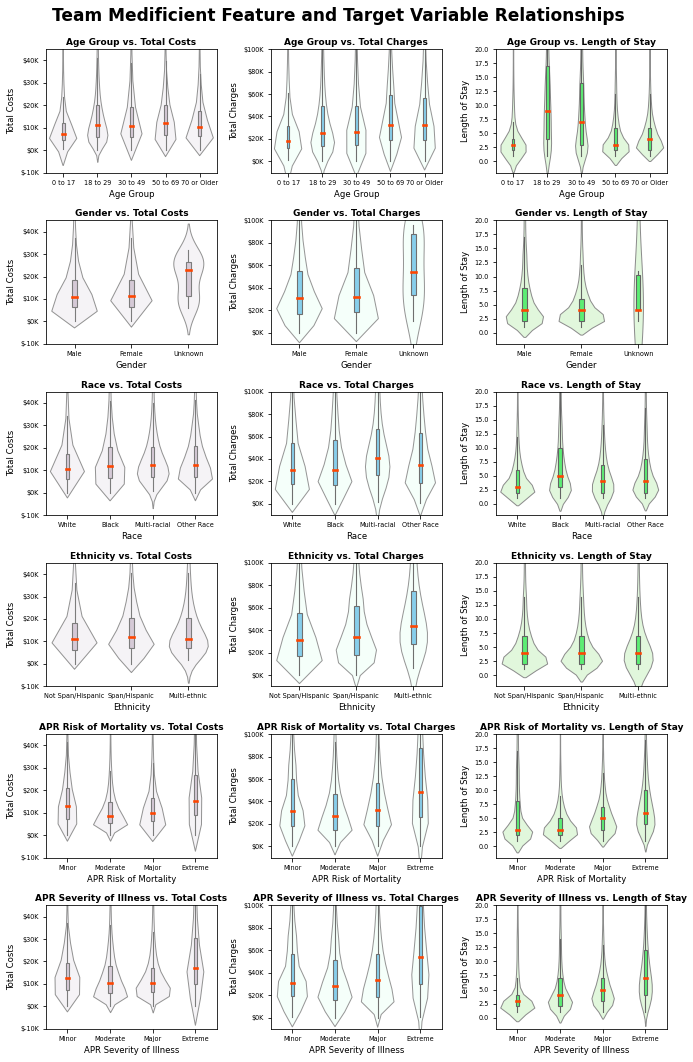

In [31]:
# Set up our axes layout 
rows, cols = len(columns), 3
fig, ax = plt.subplots(rows, cols, figsize = (9.5, 15))

# Add a title for the entire figure
fig.suptitle('Team Medificient Feature and Target Variable Relationships'
            , fontsize = 17
            , fontweight = 'bold')

# Loop over the axes
for row in range(rows):
    for col in range(cols):

        # Create the plots themselves, one in each axes
        sn.boxplot(ax = ax[row, col]
                 , x = columns[row]
                 , y = target_columns[col]
                 , data = df
                 , order = ord_dict[columns[row]] 
                 , linewidth = 1.1
                 , width = 0.08
                 , color = color_dict[col][0]
                 , boxprops={'zorder': 2}
                 , saturation = 1
                 , showfliers = False
                 , showcaps = False
                 , medianprops = dict(color = 'orangered', linewidth = 2.6)
                 )
        sn.violinplot(ax = ax[row, col]
                    , x = columns[row]
                    , y = target_columns[col]
                    , data = df
                    , order = ord_dict[columns[row]] 
                    , linewidth = 1
                    , scale = 'area' # 'width', 'count'
                    , inner = None
                    , color = color_dict[col][1]
                    , saturation = 1
                     )

        # Format the labels
        ax[row, col].set_xlabel(columns[row], size = 8.5)
        ax[row, col].set_ylabel(target_columns[col], size = 8.5)
        ax[row, col].set_title(columns[row] + ' vs. ' + target_columns[col]
                             , fontweight = 'bold', size = 9, pad = 4)

        # Format the tick labels
        ax[row, col].tick_params(axis = 'both', labelsize = 6.5)

        # Format axis ranges
        if col == 0:
            ax[row, col].set_ylim([-10000, 45000])
        elif col == 1:
            ax[row, col].set_ylim([-10000, 100000])
        else:
            ax[row, col].set_ylim([-2, 20])

        # Format y labels
        if col <= 1:
            ylabels = ['$' + '{:,.0f}'.format(y) + 'K' for y in ax[row, col].get_yticks()/1000]
            ax[row, col].set_yticklabels(ylabels)
        else:
            pass
            
            
# Tighten everything up, and leave some space in between the figure title and the plots
plt.tight_layout(rect = [0, 0, 1, 0.988])

### Visualization Creation (Minor Boxplots)

In [32]:
# Features to visualize
columns_viz_2 = ['APR Risk of Mortality', 'APR Severity of Illness']

# Create ordering dictionary for the categorical variables
ord_dict = {'APR Risk of Mortality': ['Minor', 'Moderate', 'Major', 'Extreme'],
            'APR Severity of Illness': ['Minor', 'Moderate', 'Major', 'Extreme']}

color_dict = {0: ['#d5c9d6', '#f5f3f6'],
              1: ['skyblue', 'mintcream'],
              2: ['#5ced73', '#e1f7dc']}

<ipython-input-33-580ee4a3f639>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-33-580ee4a3f639>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-33-580ee4a3f639>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)
<ipython-input-33-580ee4a3f639>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row, col].set_yticklabels(ylabels)


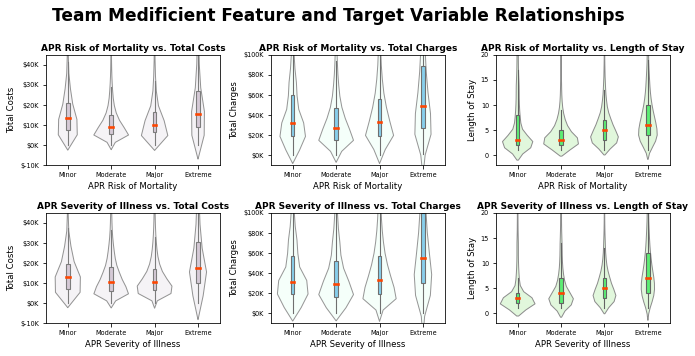

In [33]:
# Set up our axes layout 
rows, cols = len(columns_viz_2), 3
fig, ax = plt.subplots(rows, cols, figsize = (9.5, 5))

# Add a title for the entire figure
fig.suptitle('Team Medificient Feature and Target Variable Relationships'
            , fontsize = 17
            , fontweight = 'bold')

# Loop over the axes
for row in range(rows):
    for col in range(cols):

        # Create the plots themselves, one in each axes
        sn.boxplot(ax = ax[row, col]
                 , x = columns_viz_2[row]
                 , y = target_columns[col]
                 , data = df
                 , order = ord_dict[columns_viz_2[row]] 
                 , linewidth = 1.1
                 , width = 0.08
                 , color = color_dict[col][0]
                 , boxprops={'zorder': 2}
                 , saturation = 1
                 , showfliers = False
                 , showcaps = False
                 , medianprops = dict(color = 'orangered', linewidth = 2.6)
                 )
        sn.violinplot(ax = ax[row, col]
                    , x = columns_viz_2[row]
                    , y = target_columns[col]
                    , data = df
                    , order = ord_dict[columns_viz_2[row]] 
                    , linewidth = 1
                    , scale = 'area' # 'width', 'count'
                    , inner = None
                    , color = color_dict[col][1]
                    , saturation = 1
                     )

        # Format the labels
        ax[row, col].set_xlabel(columns_viz_2[row], size = 8.5)
        ax[row, col].set_ylabel(target_columns[col], size = 8.5)
        ax[row, col].set_title(columns_viz_2[row] + ' vs. ' + target_columns[col]
                             , fontweight = 'bold', size = 9, pad = 4)

        # Format the tick labels
        ax[row, col].tick_params(axis = 'both', labelsize = 6.5)

        # Format axis ranges
        if col == 0:
            ax[row, col].set_ylim([-10000, 45000])
        elif col == 1:
            ax[row, col].set_ylim([-10000, 100000])
        else:
            ax[row, col].set_ylim([-2, 20])

        # Format y labels
        if col <= 1:
            ylabels = ['$' + '{:,.0f}'.format(y) + 'K' for y in ax[row, col].get_yticks()/1000]
            ax[row, col].set_yticklabels(ylabels)
        else:
            pass
            
            
# Tighten everything up, and leave some space in between the figure title and the plots
plt.tight_layout(rect = [0, 0, 1, 0.988])